### **데이터 획득 방법**
Dacon 3회 아파트 경매가격 예측 모델링 대회 데이터를 사용합니다.  
https://dacon.io/competitions/official/17801/data?join=0  
  
  
  • 위 링크를 통해 데이터를 다운받아 주세요  
1) Dacon에 가입하시고, 대회 참여하면 다운로드가 가능합니다.  
2) 과제는 'Auction_master_train.csv'을 사용해 진행합니다.
(Target 변수는 Hammer Price 입니다.)

# 투빅스 13기 김현선

## 2주차 과제

In [1]:
# 데이터프레임 관련 패키지 import
import pandas as pd

In [2]:
#데이터 불러오기 및 첫 데이터 모든 column 보기
data = pd.read_csv('C:/Temp/Auction_master_train.csv')
df=data.copy()  #혹시 몰라서 원데이터는 data란 변수에 남겨놓았다.

pd.set_option('display.max_columns', 500) #데이터 column을 500개 display하라는 함수(모든 column을 보기 위해 임의로 500개로 지정한 것이다.)


### 1. scatter plot EDA

In [3]:
#그래프 그리는데 필요한 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns  #이쁜 sns plot을 위해 import

%matplotlib inline

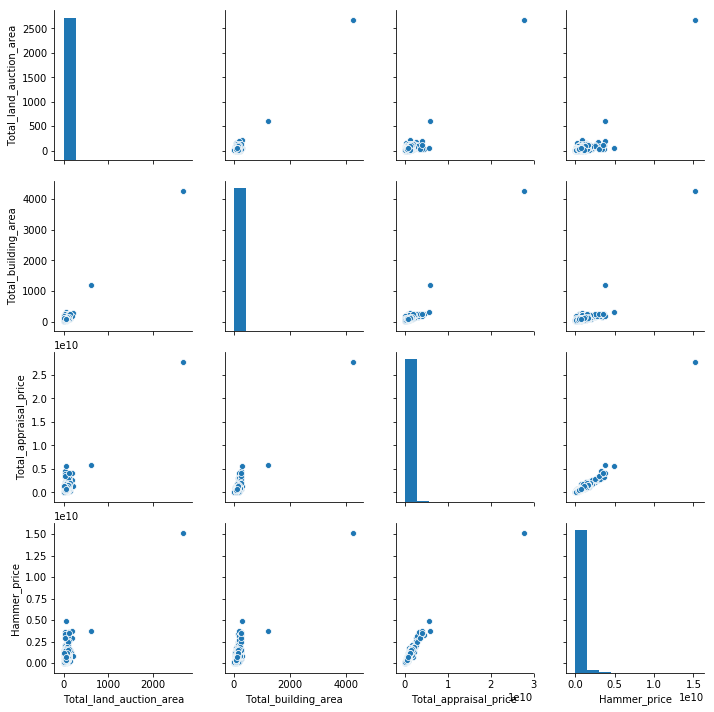

In [4]:
sns.pairplot(data=df, vars=['Total_land_auction_area','Total_building_area',
                            'Total_appraisal_price', 'Hammer_price']) 
plt.show()

In [5]:
#outlier처럼 보이는 점 찾기
Index_label = df.query('Total_land_auction_area > 2000').index.tolist() 
print(Index_label)

[1521]


In [6]:
df.iloc[1521]

Auction_key                                                                   10
Auction_class                                                                 강제
Bid_class                                                                     일괄
Claim_price                                                           8955865567
Appraisal_company                                                           대신감정
Appraisal_date                                               2015-05-21 00:00:00
Auction_count                                                                  4
Auction_miscarriage_count                                                      3
Total_land_gross_area                                                          0
Total_land_real_area                                                     2665.84
Total_land_auction_area                                                  2665.84
Total_building_area                                                      4255.07
Total_building_auction_area 

보아하니 area와 price 간에 상관관계가 있음을 알 수 있다.(영역이 크면 당연히 값이 늘어나긴한다..)<br/>
outlier처럼 보이는 값이 존재하는데 이는 1521번째 값임을 알 수 있다. <br/>
서울 관악구에 지어진 건물이라는데 값이 너무 큰 것으로 보아 측정에 오류가 있던 것으로 추정된다. <br/>
이를 제거하고 출력해본다.

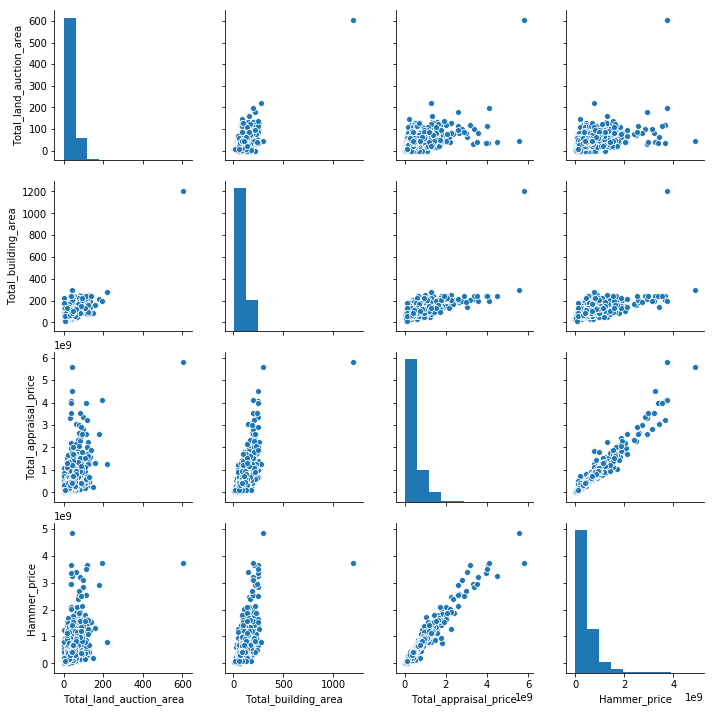

In [7]:
df=df.drop(df.index[1521])
sns.pairplot(data=df, vars=['Total_land_auction_area','Total_building_area',
                            'Total_appraisal_price', 'Hammer_price']) 
plt.show()

이제 조금 그래프다운 형태를 띠나 여전히 outlier 의심점이 보인다.<br/>
이를 또 찾아보도록 하자.

In [8]:
#두번째 outlier 의심 점 찾기
Index_label = df.query('Total_land_auction_area > 400').index.tolist() 
print(Index_label) 

[1212]


In [9]:
df.iloc[1212]

Auction_key                                                                 1437
Auction_class                                                                 임의
Bid_class                                                                     일괄
Claim_price                                                            600000000
Appraisal_company                                                           영현감정
Appraisal_date                                               2016-07-12 00:00:00
Auction_count                                                                  5
Auction_miscarriage_count                                                      3
Total_land_gross_area                                                          0
Total_land_real_area                                                       603.2
Total_land_auction_area                                                    603.2
Total_building_area                                                      1203.76
Total_building_auction_area 

이는 서울 강북구 번동의 아파트, Total building area는 약 1200평방미터로 나온다.<br/>
outlier인지 아닌지 판단하기 위하여 주소 '시'의 평균을 보기로 한다.

In [10]:
df.groupby('addr_si').mean()

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_bunji1,addr_bunji2,Total_floor,Current_floor,road_bunji1,road_bunji2,point.y,point.x,Hammer_price
addr_si,,,,,,,,,,,,,,,,,,,,
강남구,201.333333,8.315065e+08,1.794118,0.745098,41692.277059,58.097059,54.699020,129.649902,122.521176,1.448500e+09,1.210360e+09,436.911765,9.840909,17.303922,10.401961,129.617647,5.000000,37.503128,127.051402,1.399296e+09
강동구,523.512821,3.554551e+08,1.717949,0.717949,34967.487179,49.724872,49.059487,100.024359,98.572308,5.614872e+08,4.830585e+08,328.743590,6.294118,15.820513,8.358974,295.717949,10.000000,37.545619,127.143863,5.481503e+08
강북구,1496.714286,2.010612e+08,1.904762,0.857143,57663.609524,68.720952,67.734762,136.174762,134.985714,6.005476e+08,4.152057e+08,684.904762,39.000000,17.333333,9.571429,130.400000,3.000000,37.630671,127.024243,4.914191e+08
강서구,1299.871795,5.570787e+08,1.717949,0.679487,25424.229487,40.545769,39.831410,76.207821,74.926667,3.466603e+08,2.997796e+08,1172.051282,19.357143,12.794872,7.487179,89.610390,7.000000,37.077213,127.239927,3.400114e+08
관악구,194.857143,2.063611e+08,2.238095,1.095238,34628.861667,37.690476,36.850238,87.553095,85.854048,4.074048e+08,3.333106e+08,1332.642857,32.263158,15.547619,6.619048,150.428571,12.500000,37.477864,126.938094,3.820510e+08
광진구,518.521739,3.073419e+08,1.956522,0.956522,15470.369565,48.255217,48.255217,99.774348,99.774348,6.286522e+08,5.062035e+08,468.130435,54.000000,14.478261,7.086957,151.363636,2.500000,37.542878,127.090860,5.896738e+08
구로구,1092.596491,2.181164e+08,1.894737,0.877193,21730.326316,34.275789,32.581053,83.836316,80.343684,3.572682e+08,2.989674e+08,533.357143,53.655172,16.000000,9.035088,88.854545,9.666667,37.496498,126.871492,3.407228e+08
금정구,2068.827586,9.750046e+07,1.689655,0.620690,18515.200000,37.806897,36.791724,88.660000,87.241379,2.360552e+08,2.072538e+08,518.379310,21.578947,15.172414,7.793103,89.827586,4.500000,35.237879,129.089680,2.417927e+08
금천구,1086.200000,1.496667e+08,1.920000,0.920000,40223.364000,42.963200,42.963200,93.883600,93.883600,3.483200e+08,2.883920e+08,860.520000,11.533333,14.720000,7.920000,283.291667,NaN,37.455508,126.903505,3.283875e+08


거의 모든 지역의 경매 지역 면적 평균이  60제곱미터 이하인데 1200 제곱미터 정도로 나온 것을 보아 outlier로 판단해야 할 것 같다.<br/>
google maps에 (37.6373, 127.031)지역 좌표를 찍어보면 건물이 집합된 장소가 나오며 1200제곱미터에 해당하는 면적을 출력해보니 생각보다 크지 않아 아마 건물 한개가 아닌 단지의 면적을 측정한 것이 아닌가싶다. <br/>
다른 측정값들과 측정 방법이 다른 것으로 의심되므로 outlier로 지정, 이를 제거하고 이후 분석을 진행한다.

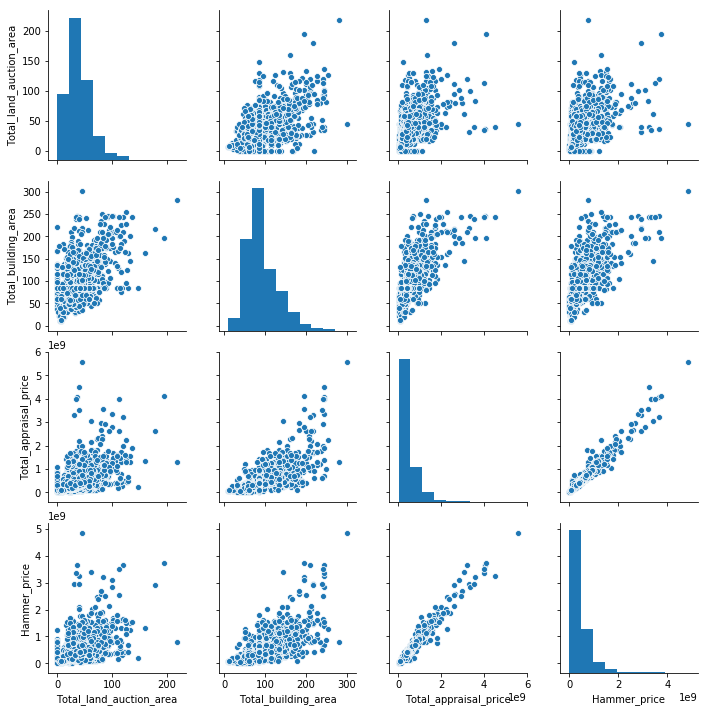

In [11]:
df=df.drop(df.index[1212])
sns.pairplot(data=df, vars=['Total_land_auction_area','Total_building_area',
                            'Total_appraisal_price', 'Hammer_price']) 
plt.show()

훨씬 깔끔한 scatter plot이 출력된다.

### 2. Histogram EDA

위의 pairplot을 보면 Price 관련 변수들이 왼쪽으로 치우침을 알 수 있다.<br/>
이를 수정하기 위해 변수 변환을 시도하겠다.<br/>
우선 다음과 같이 Hammer price에 관한 요약 설명을 보면 범위가 매우 큼을 알 수 있다.

#### 표준화

In [12]:
df['Hammer_price'].describe()
#최소가 6303000, 최대가 4863000000로 범위도 크고 값도 큼을 알 수 있으므로 표준화를 하겠다.

count    1.931000e+03
mean     4.634065e+08
std      4.403236e+08
min      6.303000e+06
25%      1.972775e+08
50%      3.535000e+08
75%      5.564095e+08
max      4.863000e+09
Name: Hammer_price, dtype: float64

In [13]:
#price를 표준화 하는 김에 area도 표준화시켜보도록 한다.
#object가 있는 dataframe이라 전체를 정규화할 수 없어 area와 price 변수를 따로 df2에 저장하였다.

df2=df.iloc[:,9:15]
df2['Hammer_price']=df['Hammer_price']
df2.head()

,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,Hammer_price
0,37.35,37.35,181.77,181.77,836000000,668800000,760000000
1,18.76,18.76,118.38,118.38,1073000000,858400000,971889999
2,71.00,71.00,49.94,49.94,119000000,76160000,93399999
3,32.98,32.98,84.91,84.91,288400000,230720000,256899000
4,45.18,45.18,84.96,84.96,170000000,136000000,158660000


In [14]:
##정규화##
from sklearn.preprocessing import MinMaxScaler   #MinMaxScaler import
scaler=MinMaxScaler() #scaler라는 변수로 간편하게 설정가능하도록 입력


scaled=scaler.fit_transform(df2)   #정규화
df2_s = pd.DataFrame(scaled, index=df2.index, columns=df2.columns)
df2_s.head()

#https://soo-jjeong.tistory.com/122   ##정규화
#정규화된 결과값(array형태)를 원래의 dataframe 형태로 변환
#https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,Hammer_price
0,0.171330,0.171330,0.590181,0.600960,0.149435,0.149272,0.155187
1,0.086055,0.086055,0.373151,0.389639,0.192018,0.191862,0.198816
2,0.325688,0.325688,0.138832,0.161483,0.020611,0.016145,0.017933
3,0.151284,0.151284,0.258559,0.278061,0.051047,0.050865,0.051598
4,0.207248,0.207248,0.258730,0.278228,0.029774,0.029587,0.031370


MinMax Scaler는 (x - min)/(max-min) 의 값을 나타낸 것으로 데이터를 0과 1사이의 범위로 맞춰 scaling하는 것이다. <br/>
scaling의 다른 방식인 standard scaler는 평균=0, 분산=1로 scaling 하는 것이며 from sklearn.preprocessing import StandardScaler 로 import 가능하다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC3EDD9278>,
      dtype=object)

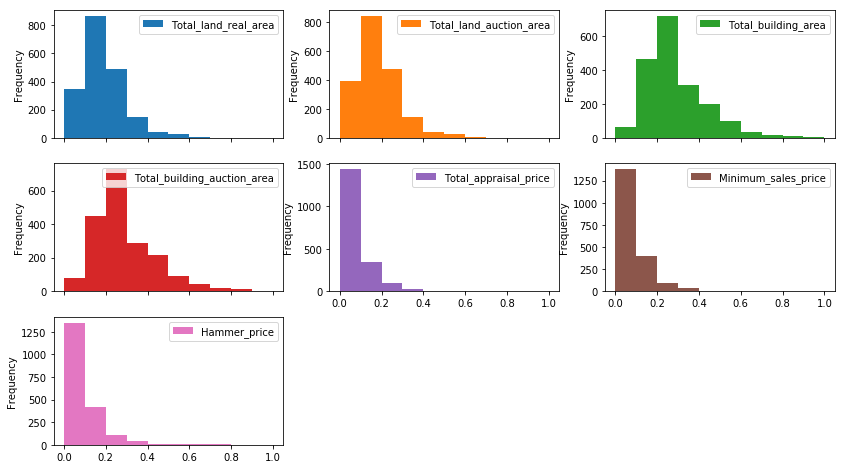

In [15]:
plt.rcParams['figure.figsize'] = (14.0, 8.0)
df2_s.plot.hist(subplots=True, legend=True, layout=(3, 3))

#figure size 조정
#https://harangdev.github.io/applied-data-science-with-python/applied-data-plotting-in-python/3/

위와같이 scaling은 히스토그램에 영향이 없다.<br/>
변수 변환을 통해 히스토그램을 좀 더 이쁘게 변환해보겠다.

#### 변수 변환 - log를 취하여 그래프 변환

In [16]:
df2_s.head()

,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,Hammer_price
0,0.171330,0.171330,0.590181,0.600960,0.149435,0.149272,0.155187
1,0.086055,0.086055,0.373151,0.389639,0.192018,0.191862,0.198816
2,0.325688,0.325688,0.138832,0.161483,0.020611,0.016145,0.017933
3,0.151284,0.151284,0.258559,0.278061,0.051047,0.050865,0.051598
4,0.207248,0.207248,0.258730,0.278228,0.029774,0.029587,0.031370


In [17]:
import numpy as np

df2_s['Total_appraisal_price']=np.log(df2_s['Total_appraisal_price'])
df2_s['Minimum_sales_price']=np.log(df2_s['Minimum_sales_price'])
df2_s['Hammer_price']=np.log(df2_s['Hammer_price'])

df2_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1931 entries, 0 to 1932
Data columns (total 7 columns):
Total_land_real_area           1931 non-null float64
Total_land_auction_area        1931 non-null float64
Total_building_area            1931 non-null float64
Total_building_auction_area    1931 non-null float64
Total_appraisal_price          1931 non-null float64
Minimum_sales_price            1931 non-null float64
Hammer_price                   1931 non-null float64
dtypes: float64(7)
memory usage: 200.7 KB


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [18]:
#Inf, -Inf를 NaN으로 처리 후 제거하기
import numpy as np
df2_s=df2_s.replace([-np.inf,np.inf], np.nan)
df2_s=df2_s.dropna(axis=0)
df2_s.info()

#-Inf 값이 나와 제거를 하니 2 줄이 제거됨을 알 수 있다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929 entries, 0 to 1932
Data columns (total 7 columns):
Total_land_real_area           1929 non-null float64
Total_land_auction_area        1929 non-null float64
Total_building_area            1929 non-null float64
Total_building_auction_area    1929 non-null float64
Total_appraisal_price          1929 non-null float64
Minimum_sales_price            1929 non-null float64
Hammer_price                   1929 non-null float64
dtypes: float64(7)
memory usage: 120.6 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC3ED91198>,
      dtype=object)

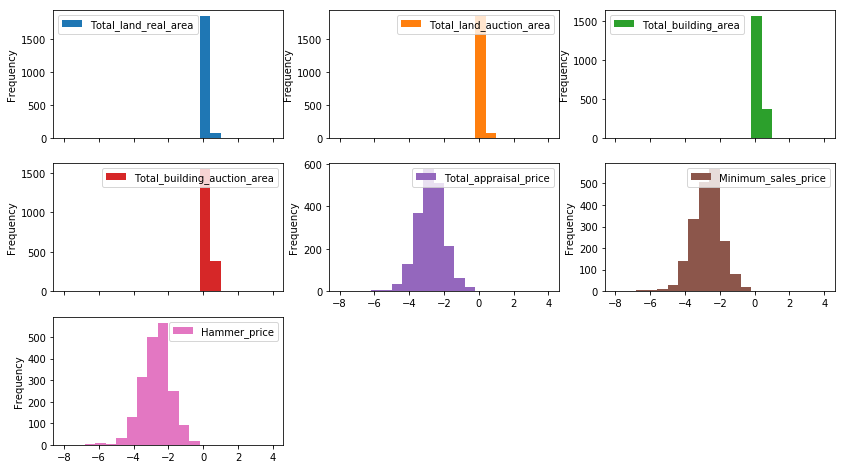

In [19]:
df2_s.plot.hist(subplots=True, legend=True, layout=(3, 3), range=(-8,4), bins=20)

#plot.hist의 다른 조건들 참조
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

xlabel의 범위가 일치하지 않아 price 그래프는 이쁘게 나왔으나 area 그래프는 한곳에 몰려있어 보임을 알 수 있다.<br/>
이는 다음에 나타낼 subplot 개별 지정을 통해 해결할 수 있다. 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 360x720 with 0 Axes>

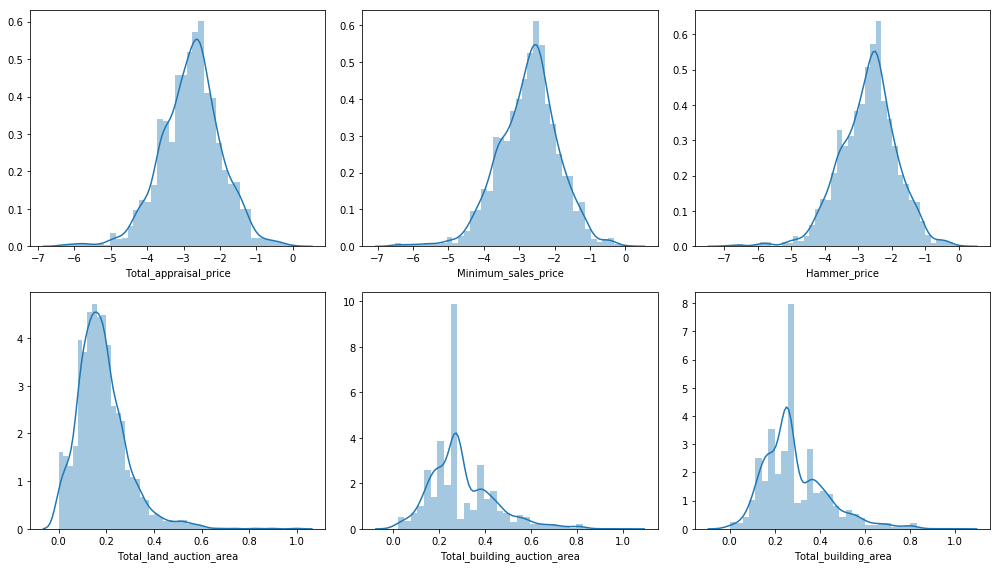

In [20]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

fig = plt.figure(figsize=(5, 10)) 
plt.tight_layout()
fig.subplots_adjust(bottom=0.5)

f,ax=plt.subplots(6,2) # 5개의 Figure

#각 subplot 크기를 조정하는 방법
gs = gridspec.GridSpec(nrows=2, # row 몇 개 
                       ncols=3, # col 몇 개 
                       height_ratios=[1, 1], 
                       width_ratios=[2,2,2]
                      )

###첫째줄-price plot
ax[0] = plt.subplot(gs[0])
ax[0] = sns.distplot(df2_s['Total_appraisal_price'])

ax[1] = plt.subplot(gs[1])
ax[1] = sns.distplot(df2_s['Minimum_sales_price'])

ax[2] = plt.subplot(gs[2])
ax[2] = sns.distplot(df2_s['Hammer_price'])


##둘째줄 - area plot
ax[3] = plt.subplot(gs[3])
ax[3] = sns.distplot(df2_s['Total_land_auction_area'])

ax[4] = plt.subplot(gs[4])
ax[4] = sns.distplot(df2_s['Total_building_auction_area'])

ax[5] = plt.subplot(gs[5])
ax[5] = sns.distplot(df2_s['Total_building_area'])

plt.tight_layout()
plt.show()


이제 그래프들이 대략적인 정규분포 모양을 따름을 알 수 있다. <br/>
다만 Total building auction area가 특정 값에 몰려있게 됨을 알 수 있는데 이는 건물이 지어지는 지역에서의 면적의 한계점이 존재한다고 파악할 수 있을 것 같다.<br/>
Total building auction area와 Total building area는 거의 일치하나 경매에 사용된 빌딩의 면적이 좀 더 특정 값에 몰리는 것을 보아 경매에 선호되는 면적이 있거나, 범위를 내리거나 올려서 특정 값을 맞춘 것이 아닐까싶다.

# 범주형 변수 인코딩

### 1. 날짜 인코딩 - 과제 1 참조

In [21]:
#아까 제외한 행들이 있으므로 index 다시 지정
df=df.reset_index()
del df['index']
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html


#날짜 뒤에 시간은 필요없으므로 제거한다.
df["First_auction_date"]= df["First_auction_date"].str.split(" ", n = 1, expand = True)
df["Final_auction_date"]= df["Final_auction_date"].str.split(" ", n = 1, expand = True)

#https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/


#요일 출력을 위해 ' '로 분리하고 datetime.strftime에 차례로 입력하여 요일을 출력해보도록한다.
from datetime import datetime
import numpy as np


#-를 기준으로 split
a_s=df["First_auction_date"].str.split("-",expand = True)    
a_e=df["Final_auction_date"].str.split("-", expand = True)


#split 결과가 object 형태로 반환되어 numeric으로 바꾸기
a_s[0]=pd.to_numeric(a_s[0]) 
a_s[1]=pd.to_numeric(a_s[1])
a_s[2]=pd.to_numeric(a_s[2])

a_e[0]=pd.to_numeric(a_e[0])
a_e[1]=pd.to_numeric(a_e[1])
a_e[2]=pd.to_numeric(a_e[2])


#요일 출력 변수 생성 및 초기값 지정
df['auction_start_weekday']=0
df['auction_end_weekday']=0


#요일 기록
for i in range(0,len(df)):
    df['auction_start_weekday'][i]=datetime(a_s[0][i], a_s[1][i], a_s[2][i]).weekday()
    df['auction_end_weekday'][i]=datetime(a_e[0][i],a_e[1][i],a_e[2][i]).weekday()

    
#https://stackoverflow.com/questions/9847213/how-do-i-get-the-day-of-week-given-a-date   ##monday-sunday로 글자로 기록
#https://docs.python.org/2/library/datetime.html   ##숫자로 기록, 0=Monday

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [22]:
df.head() #변수가 잘 생성되었는지 확인

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price,auction_start_weekday,auction_end_weekday
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13,2018-03-20,낙찰,베리타스자산관리대부,부산,해운대구,우동,NaN,N,1398.0,NaN,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000,1,1
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29,2017-02-02,낙찰,흥국저축은행,부산,해운대구,우동,NaN,N,1407.0,NaN,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999,3,3
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28,2017-10-13,낙찰,국민은행,부산,사상구,모라동,NaN,N,552.0,NaN,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999,4,4
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20,2017-11-02,낙찰,고려저축은행,부산,남구,대연동,NaN,N,243.0,23.0,대연청구 109동 11층 1102호,아파트,2001-07-13 00:00:00,20,11,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000,3,3
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06,2016-08-03,낙찰,Private,부산,사하구,괴정동,NaN,N,399.0,2.0,동조리젠시 7층 703호,아파트,2001-11-27 00:00:00,7,7,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000,2,2


날짜를 Monday=0에서 Sunday=7으로 인코딩하였다.<br/>
추가 분석을 위해 경매 기간 변수도 추가하겠다.

In [23]:
#초기값 지정
df['auction_start_day']=0
df['auction_end_day']=0


for i in range(0,len(df)):
    #날짜 값들을 date형식으로 남기기
    df['auction_start_day'][i]=datetime(a_s[0][i], a_s[1][i], a_s[2][i])
    df['auction_end_day'][i]=datetime(a_e[0][i], a_e[1][i], a_e[2][i])
    

#초기값 지정
df['auction_day_length']=0
for i in range(0,len(df)):
    df['auction_day_length'][i]=(df['auction_end_day'][i]-df['auction_start_day'][i]).days
    

#https://stackoverflow.com/questions/151199/how-to-calculate-number-of-days-between-two-given-dates


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [24]:
df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price,auction_start_weekday,auction_end_weekday,auction_start_day,auction_end_day,auction_day_length
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13,2018-03-20,낙찰,베리타스자산관리대부,부산,해운대구,우동,NaN,N,1398.0,NaN,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000,1,1,2018-02-13 00:00:00,2018-03-20 00:00:00,35
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29,2017-02-02,낙찰,흥국저축은행,부산,해운대구,우동,NaN,N,1407.0,NaN,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999,3,3,2016-12-29 00:00:00,2017-02-02 00:00:00,35
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28,2017-10-13,낙찰,국민은행,부산,사상구,모라동,NaN,N,552.0,NaN,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999,4,4,2017-07-28 00:00:00,2017-10-13 00:00:00,77
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20,2017-11-02,낙찰,고려저축은행,부산,남구,대연동,NaN,N,243.0,23.0,대연청구 109동 11층 1102호,아파트,2001-07-13 00:00:00,20,11,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000,3,3,2017-07-20 00:00:00,2017-11-02 00:00:00,105
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06,2016-08-03,낙찰,Private,부산,사하구,괴정동,NaN,N,399.0,2.0,동조리젠시 7층 703호,아파트,2001-11-27 00:00:00,7,7,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000,2,2,2016-07-06 00:00:00,2016-08-03 00:00:00,28


In [25]:
#이제 분석에 필요없는 변수이므로 제거 (이후 데이터프레임 형성 편의를 위한 과정)
del df['auction_start_day']
del df['auction_end_day']

### 2. Bid Class 인코딩 - 과제1 참조

In [26]:
#Bid_class를 숫자로 변환하겠다.
df['Bid']=0
for i in range(0,len(df)):
        if df['Bid_class'][i]=='일반':
            df['Bid'][i]=0
        elif df['Bid_class'][i]=='개별':
            df['Bid'][i]=1
        else: df['Bid'][i]=2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
df.head() #변수가 잘 생성되었는지 확인

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price,auction_start_weekday,auction_end_weekday,auction_day_length,Bid
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13,2018-03-20,낙찰,베리타스자산관리대부,부산,해운대구,우동,NaN,N,1398.0,NaN,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000,1,1,35,1
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29,2017-02-02,낙찰,흥국저축은행,부산,해운대구,우동,NaN,N,1407.0,NaN,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999,3,3,35,0
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28,2017-10-13,낙찰,국민은행,부산,사상구,모라동,NaN,N,552.0,NaN,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999,4,4,77,1
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20,2017-11-02,낙찰,고려저축은행,부산,남구,대연동,NaN,N,243.0,23.0,대연청구 109동 11층 1102호,아파트,2001-07-13 00:00:00,20,11,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000,3,3,105,0
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06,2016-08-03,낙찰,Private,부산,사하구,괴정동,NaN,N,399.0,2.0,동조리젠시 7층 703호,아파트,2001-11-27 00:00:00,7,7,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000,2,2,28,0


Bid라는 변수에 입찰 구분 중 일반=0, 개별=1, 일괄=2로 인코딩하였다.

### 3. 건물(토지)의 대표 용도 인코딩

In [28]:
df.groupby('Apartment_usage').count()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price,auction_start_weekday,auction_end_weekday,auction_day_length,Bid
Apartment_usage,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
아파트,1654,1654,1654,1654,1654,1654,1654,1654,1654,1654,1654,1654,1654,1654,1654,1654,1654,1654,1654,1654,1654,1654,22,1654,1651,686,1654,1654,1654,1654,41,1654,1654,1647,129,1654,1654,1654,1654,1654,1654,1654,1654,1654
주상복합,277,277,277,277,277,277,277,277,277,277,277,277,277,277,277,277,277,277,277,277,277,277,1,277,276,201,277,277,277,277,21,277,277,261,26,277,277,277,277,277,277,277,277,277


건물(토지)의 대표 용도를 grouping하여 count한 결과 '아파트'와 '주상복합' 두 가지로 나뉨을 알 수 있다.<br/>
이를 인코딩하겠다.

In [29]:
#Apartment usage 인코딩
df['Use']=0
for i in range(0,len(df)):
        if df['Apartment_usage'][i]=='아파트':
            df['Use'][i]=0
        else: df['Use'][i]=1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [30]:
df.head()  #변수가 잘 생성되었는지 확인

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price,auction_start_weekday,auction_end_weekday,auction_day_length,Bid,Use
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13,2018-03-20,낙찰,베리타스자산관리대부,부산,해운대구,우동,NaN,N,1398.0,NaN,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000,1,1,35,1,1
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29,2017-02-02,낙찰,흥국저축은행,부산,해운대구,우동,NaN,N,1407.0,NaN,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999,3,3,35,0,0
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28,2017-10-13,낙찰,국민은행,부산,사상구,모라동,NaN,N,552.0,NaN,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999,4,4,77,1,0
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20,2017-11-02,낙찰,고려저축은행,부산,남구,대연동,NaN,N,243.0,23.0,대연청구 109동 11층 1102호,아파트,2001-07-13 00:00:00,20,11,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000,3,3,105,0,0
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06,2016-08-03,낙찰,Private,부산,사하구,괴정동,NaN,N,399.0,2.0,동조리젠시 7층 703호,아파트,2001-11-27 00:00:00,7,7,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000,2,2,28,0,0


# 선형 회귀 분석

우선 회귀 분석에 사용할 데이터만 따로 data에 저장하겠다.

In [31]:
data=df2_s.copy()

columns = df.iloc[:,-5:-1]
data = pd.concat([data,columns], axis = 1)  #-4:-1의 범위로 지정해서 마지막 column이 안보여서 아래에 다시 concat 진행

lastcol=df.iloc[:,-1]
data = pd.concat([data,lastcol], axis = 1)

data.info()


#https://stackoverflow.com/questions/33532216/adding-columns-from-one-dataframe-to-another-python-pandas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933 entries, 0 to 1932
Data columns (total 12 columns):
Total_land_real_area           1929 non-null float64
Total_land_auction_area        1929 non-null float64
Total_building_area            1929 non-null float64
Total_building_auction_area    1929 non-null float64
Total_appraisal_price          1929 non-null float64
Minimum_sales_price            1929 non-null float64
Hammer_price                   1929 non-null float64
auction_start_weekday          1931 non-null float64
auction_end_weekday            1931 non-null float64
auction_day_length             1931 non-null float64
Bid                            1931 non-null float64
Use                            1931 non-null float64
dtypes: float64(12)
memory usage: 196.3 KB


In [32]:
#Inf, -Inf를 NaN으로 처리 후 제거하기
import numpy as np
data=data.replace([-np.inf,np.inf], np.nan)
data=data.dropna(axis=0)
data.info()

#6줄이 제거됨

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1927 entries, 0 to 1930
Data columns (total 12 columns):
Total_land_real_area           1927 non-null float64
Total_land_auction_area        1927 non-null float64
Total_building_area            1927 non-null float64
Total_building_auction_area    1927 non-null float64
Total_appraisal_price          1927 non-null float64
Minimum_sales_price            1927 non-null float64
Hammer_price                   1927 non-null float64
auction_start_weekday          1927 non-null float64
auction_end_weekday            1927 non-null float64
auction_day_length             1927 non-null float64
Bid                            1927 non-null float64
Use                            1927 non-null float64
dtypes: float64(12)
memory usage: 195.7 KB


In [33]:
data.head()

,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,Hammer_price,auction_start_weekday,auction_end_weekday,auction_day_length,Bid,Use
0,0.171330,0.171330,0.590181,0.600960,-1.900891,-1.901987,-1.863123,1.0,1.0,35.0,1.0,1.0
1,0.086055,0.086055,0.373151,0.389639,-1.650168,-1.650979,-1.615378,3.0,3.0,35.0,0.0,0.0
2,0.325688,0.325688,0.138832,0.161483,-3.881930,-4.126116,-4.021091,4.0,4.0,77.0,1.0,0.0
3,0.151284,0.151284,0.258559,0.278061,-2.975002,-2.978587,-2.964272,3.0,3.0,105.0,0.0,0.0
4,0.207248,0.207248,0.258730,0.278228,-3.514111,-3.520404,-3.461887,2.0,2.0,28.0,0.0,0.0


모델의 적합성 검증을 위하여 train & test data split을 진행해준다.

In [34]:
x = data.drop('Hammer_price', axis=1)
y = data.Hammer_price

In [35]:
# train, test data 분할
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)  #test data size는 전체의 20%

회귀 적합

In [36]:
from sklearn.linear_model import LinearRegression

#모델 불러옴
model = LinearRegression()
#train data에 fit시킴
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
#fit된 모델의 R-square
model.score(x_train, y_train)

0.9906239734438783

세상에 r square 값이 0.99가 나왔다. 너무 높다.

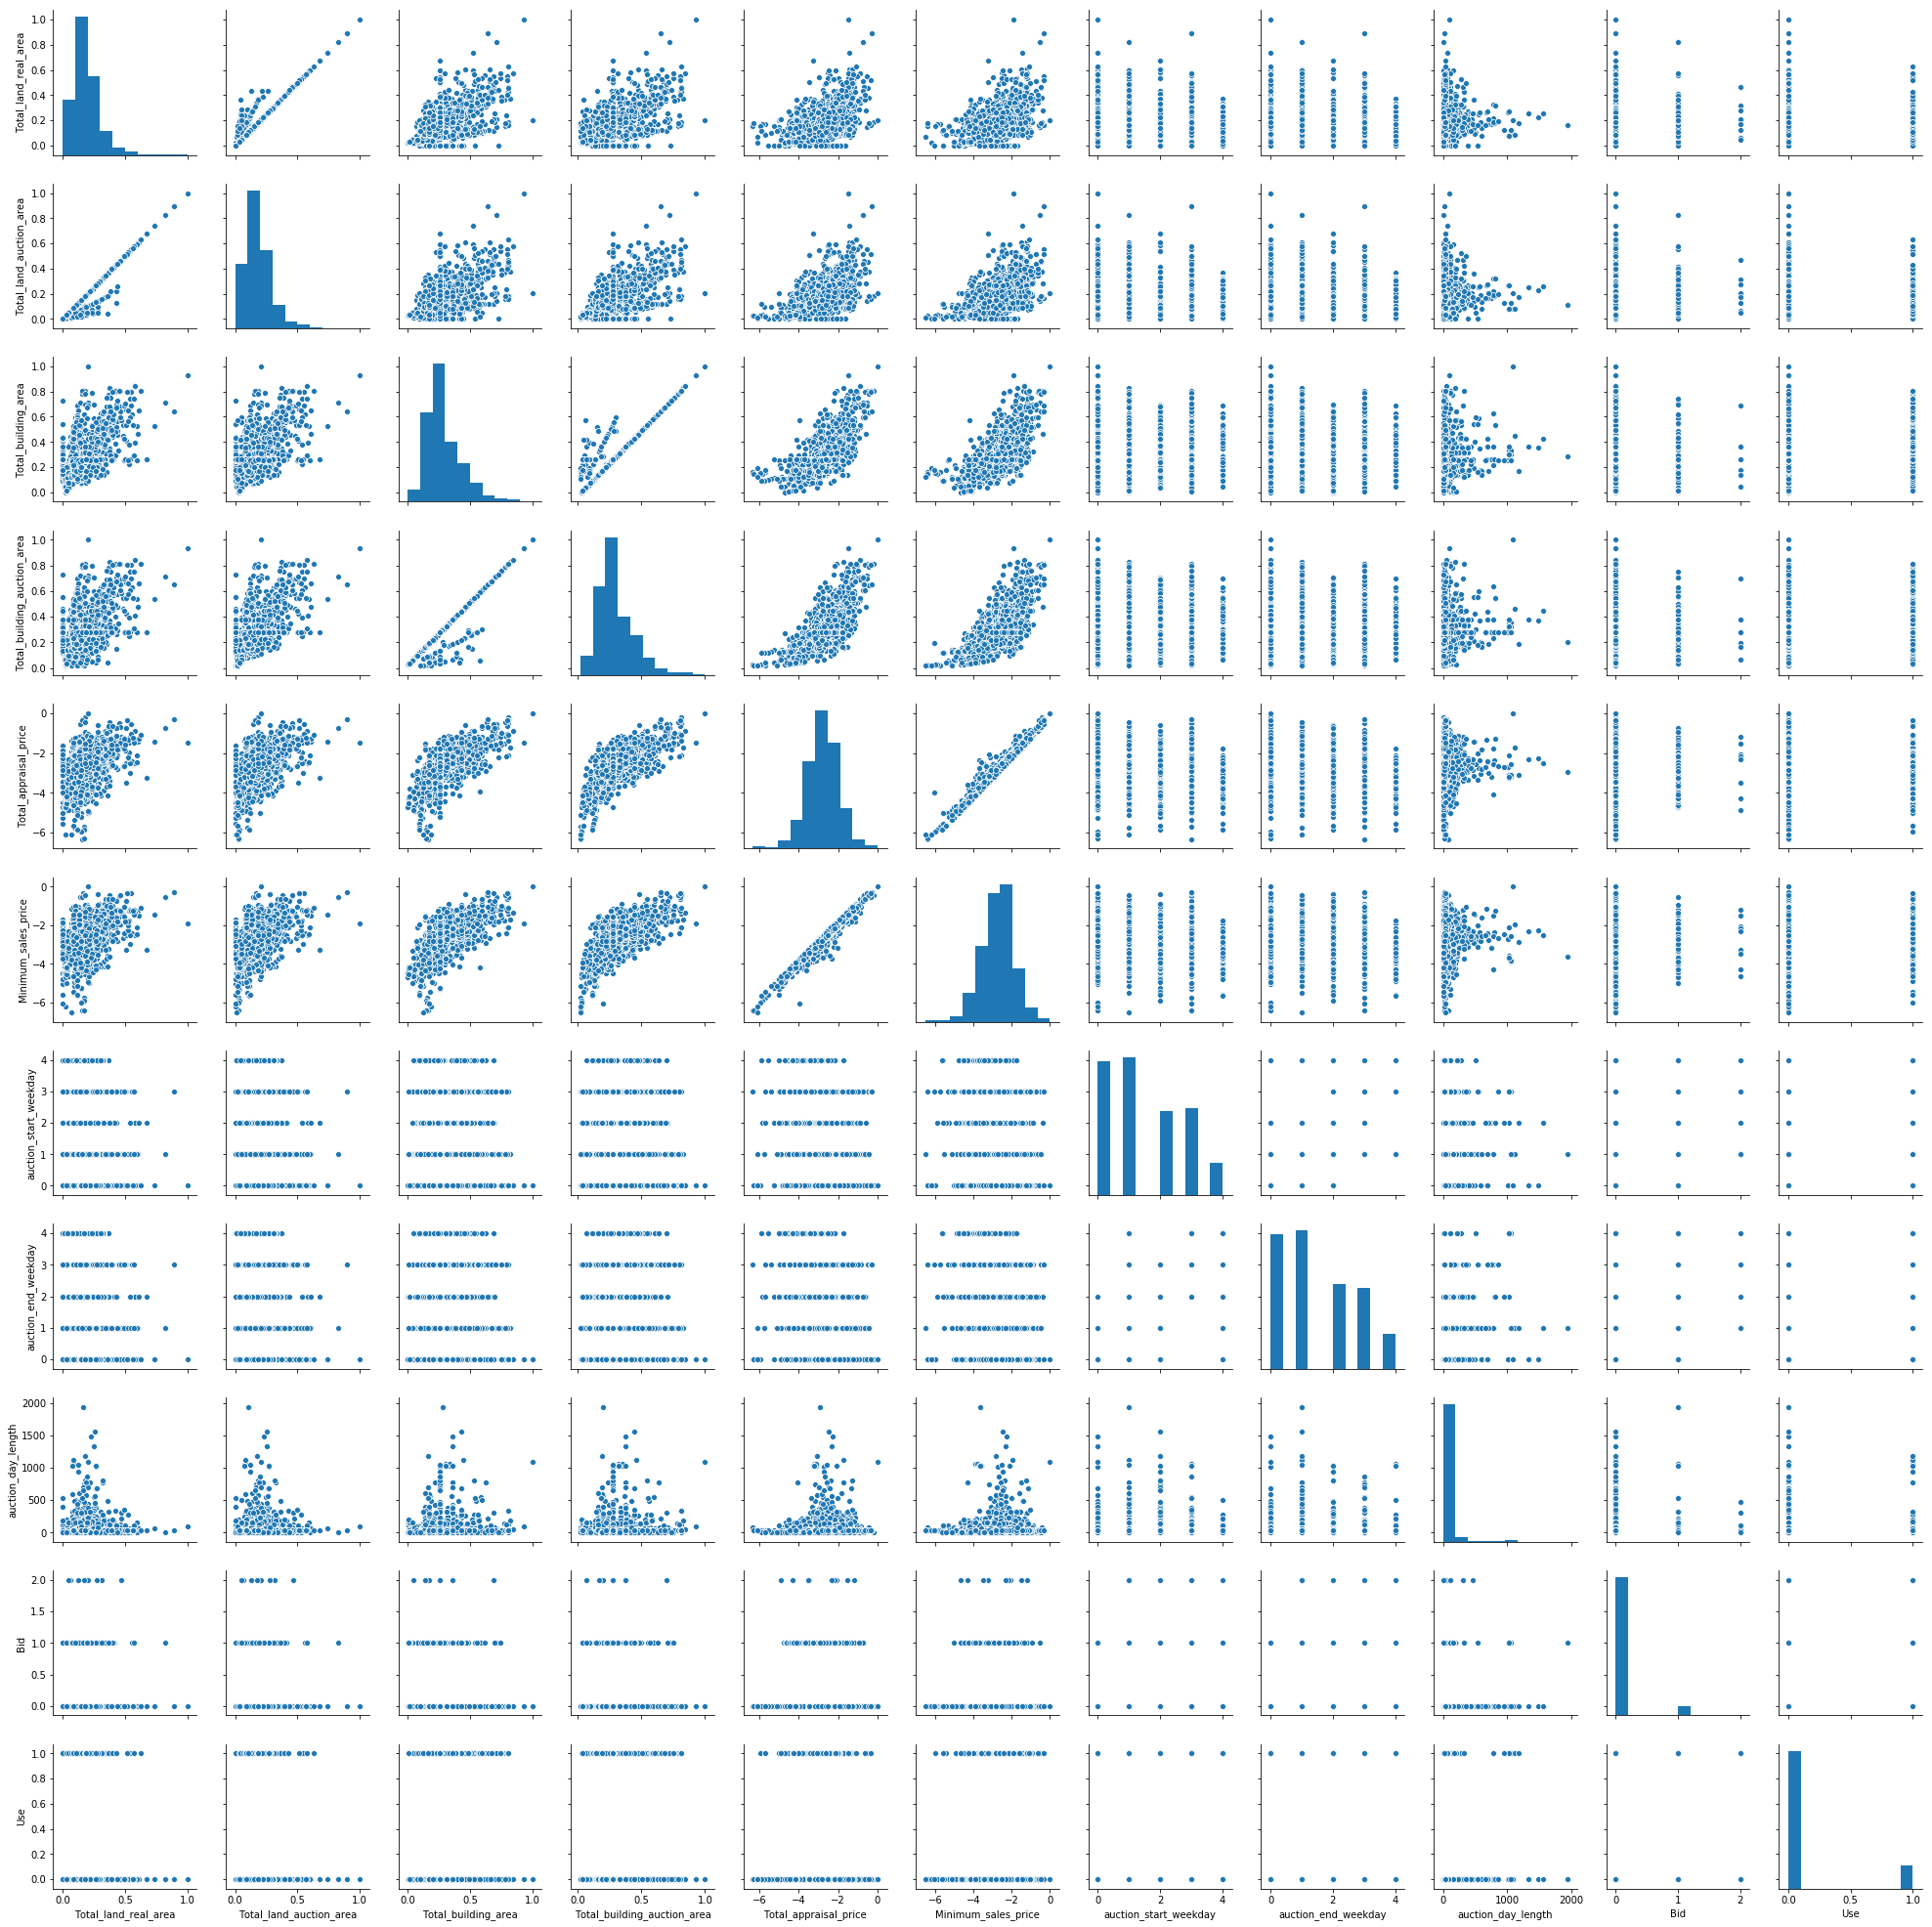

In [38]:
sns.pairplot(x)

r square가 높게 나온 이유는 서로 관련 있는 변수들이 많아서 생긴다고 볼 수도 있다.<br/>
이 데이터에서는 price관련된 변수가 3개, area 관련 변수가 4개가 있으며 서로 관련성이 큰데, 위의 pairplot에서 거의 직선으로 보이는 변수들로 얼마나 상관이 있는지 판단 가능하다.<br/>
더 정확한 판단을 위하여 VIF 검정을 진행해본다.

In [39]:
#VIF확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
0,463.486981,Total_land_real_area
1,462.807904,Total_land_auction_area
3,449.634387,Total_building_auction_area
2,415.396782,Total_building_area
4,305.326164,Total_appraisal_price
5,301.975570,Minimum_sales_price
7,32.703886,auction_end_weekday
6,32.661878,auction_start_weekday
8,1.330857,auction_day_length
10,1.294741,Use


...ㅎㅎㅎ 당연하지만 10이 훨씬 넘는다.<br/>
참고로 경매가 시작되는 요일과 끝나는 요일은 같다. 그러므로 총 경매 기간 변수를 추가하고 끝나는 요일 변수를 제거하겠다.

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1927 entries, 0 to 1930
Data columns (total 12 columns):
Total_land_real_area           1927 non-null float64
Total_land_auction_area        1927 non-null float64
Total_building_area            1927 non-null float64
Total_building_auction_area    1927 non-null float64
Total_appraisal_price          1927 non-null float64
Minimum_sales_price            1927 non-null float64
Hammer_price                   1927 non-null float64
auction_start_weekday          1927 non-null float64
auction_end_weekday            1927 non-null float64
auction_day_length             1927 non-null float64
Bid                            1927 non-null float64
Use                            1927 non-null float64
dtypes: float64(12)
memory usage: 275.7 KB


In [41]:
data1=data.copy()

del data1['Total_building_auction_area'] #이것의 분포가 더 특정값에 치우쳐져 있었으므로 제거
del data1['Total_land_auction_area'] #위에 제거하는 변수와 관련이 있어보여 real area 말고 auction area delete
del data1['Minimum_sales_price'] #Hammer Price가 Target이므로 Minimum sales price를 제거
del data1['auction_end_weekday'] #경매가 끝나는 요일 제거(경매 시작 요일과 동일)

data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1927 entries, 0 to 1930
Data columns (total 8 columns):
Total_land_real_area     1927 non-null float64
Total_building_area      1927 non-null float64
Total_appraisal_price    1927 non-null float64
Hammer_price             1927 non-null float64
auction_start_weekday    1927 non-null float64
auction_day_length       1927 non-null float64
Bid                      1927 non-null float64
Use                      1927 non-null float64
dtypes: float64(8)
memory usage: 135.5 KB


In [42]:
#다시 회귀 모델링
x = data1.drop('Hammer_price', axis=1)
y = data1.Hammer_price

# train, test data 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)  #test data size는 전체의 20%

#모델 불러옴
model = LinearRegression()
#train data에 fit시킴
model.fit(x_train, y_train)

#fit된 모델의 R-square
model.score(x_train, y_train)

0.9700522755627569

잘 나온 것 같다.

In [43]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
1,6.563827,Total_building_area
0,6.314295,Total_land_real_area
2,3.861034,Total_appraisal_price
3,2.541604,auction_start_weekday
6,1.287799,Use
4,1.250202,auction_day_length
5,1.168293,Bid


VIF도 확 줄어듦을 알 수 있다.<br/>
모두 10 미만이므로 다중공선성이 해결되었다고 볼 수 있다.<br/><br/>
이를 바탕으로 분석을 진행하겠다.

## by sklearn

In [44]:
#MSE
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(x_train))

0.021966726224034304

In [45]:
#beta hat
print(model.intercept_); print(model.coef_)

0.3850703572670273
[ 1.31329416e-01 -4.14035077e-01  1.06477497e+00 -3.25654091e-03
 -1.80639852e-04 -5.05362126e-02 -2.31552468e-02]


In [46]:
#test데이터 R-square
model.score(x_test, y_test)

0.9676691334932952

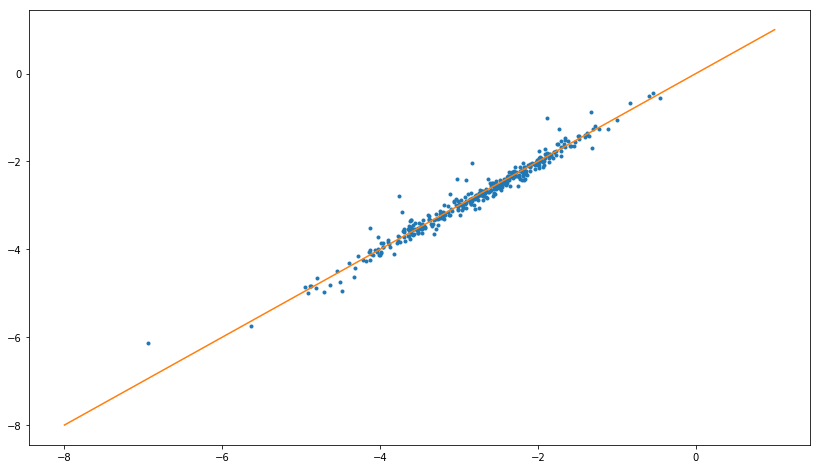

In [47]:
# 예측 vs. 실제데이터 plot
y_pred = model.predict(x_test) 
plt.plot(y_test, y_pred, '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(-8, 1, 100)
y = x
plt.plot(x, y)
plt.show()

아주 잘 추정되었고 모델링도 아주 잘된 것으로 보인다. :3

## by calculation of matrix

In [48]:
import numpy as np
from numpy.linalg import inv 

def estimate_beta(x, y):
    y=y_train.values.reshape(-1,1)
    beta_hat=inv(x.T@x)@x.T@y
    return beta_hat

#https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape  ##reshaping

In [49]:
#beta hat by matrix calculation
betahat=estimate_beta(x_train,y_train)
betahat

array([[ 2.15598318e-01],
       [ 6.70786521e-03],
       [ 9.77307539e-01],
       [-7.22238005e-03],
       [-1.66612830e-04],
       [-4.01543060e-02],
       [-1.71396365e-02]])

In [50]:
#MSE by matrix calculation
e=y_train.values.reshape(-1,1)-x_train@betahat
mse=e.T@e/(len(x_train)-len(betahat)-1)
print(mse)

          0
0  0.024926


## 비교

In [51]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression(fit_intercept=False)
#train data에 fit시킴

model2.fit(x_train, y_train)
model2.score(x_train, y_train)

#betahat by sklearn without intercept 
print(model2.coef_)

[ 2.15598318e-01  6.70786521e-03  9.77307539e-01 -7.22238005e-03
 -1.66612830e-04 -4.01543060e-02 -1.71396365e-02]


In [52]:
#MSE by sklearn without intercept 
sk.metrics.mean_squared_error(y_train, model2.predict(x_train))

0.02479706560872116

행렬로 계산한 betahat는 sklearn을 통한 계산 결과와 일치하며, MSE도 크게 다르지 않음을 알 수 있다.